In [1]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.float_format','{:.2f}'.format)
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isna().mean()*100

longitude            0.00
latitude             0.00
housing_median_age   0.00
total_rooms          0.00
total_bedrooms       1.00
population           0.00
households           0.00
median_income        0.00
median_house_value   0.00
ocean_proximity      0.00
dtype: float64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [7]:
df.describe(include='O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


# Data Spliting

In [8]:
from sklearn.model_selection import train_test_split

test_set ,train_set = train_test_split(df,train_size=0.2,random_state=42)

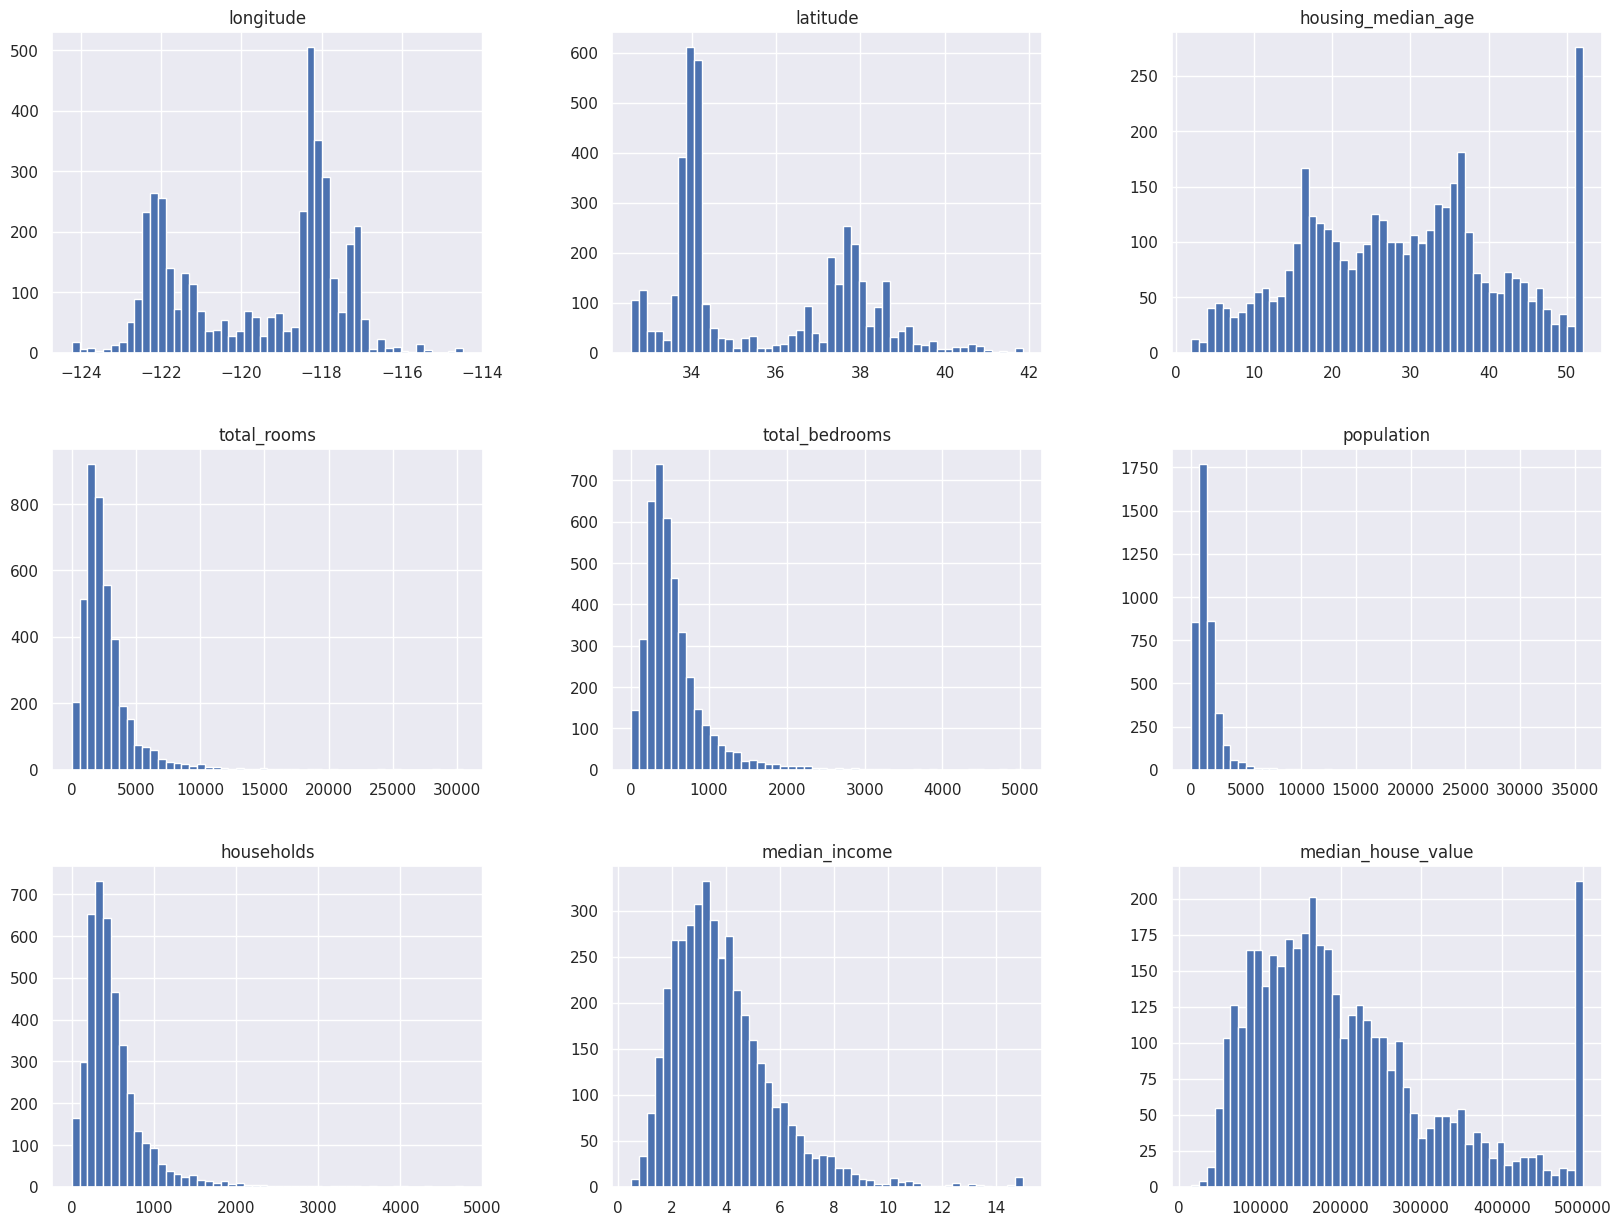

In [9]:
test_set.hist(bins=50,figsize=(20,15));

In [10]:
train_set.isna().mean()*100

longitude            0.00
latitude             0.00
housing_median_age   0.00
total_rooms          0.00
total_bedrooms       1.25
population           0.00
households           0.00
median_income        0.00
median_house_value   0.00
ocean_proximity      0.00
dtype: float64

In [11]:
train_set.duplicated().sum()

0

In [12]:
train_set.corr().median_house_value.apply(lambda x : abs(x)).sort_values(ascending = False)

<ipython-input-12-4c0053af6ce6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr().median_house_value.apply(lambda x : abs(x)).sort_values(ascending = False)


median_house_value   1.00
median_income        0.69
latitude             0.15
total_rooms          0.14
housing_median_age   0.11
households           0.07
total_bedrooms       0.05
longitude            0.04
population           0.02
Name: median_house_value, dtype: float64

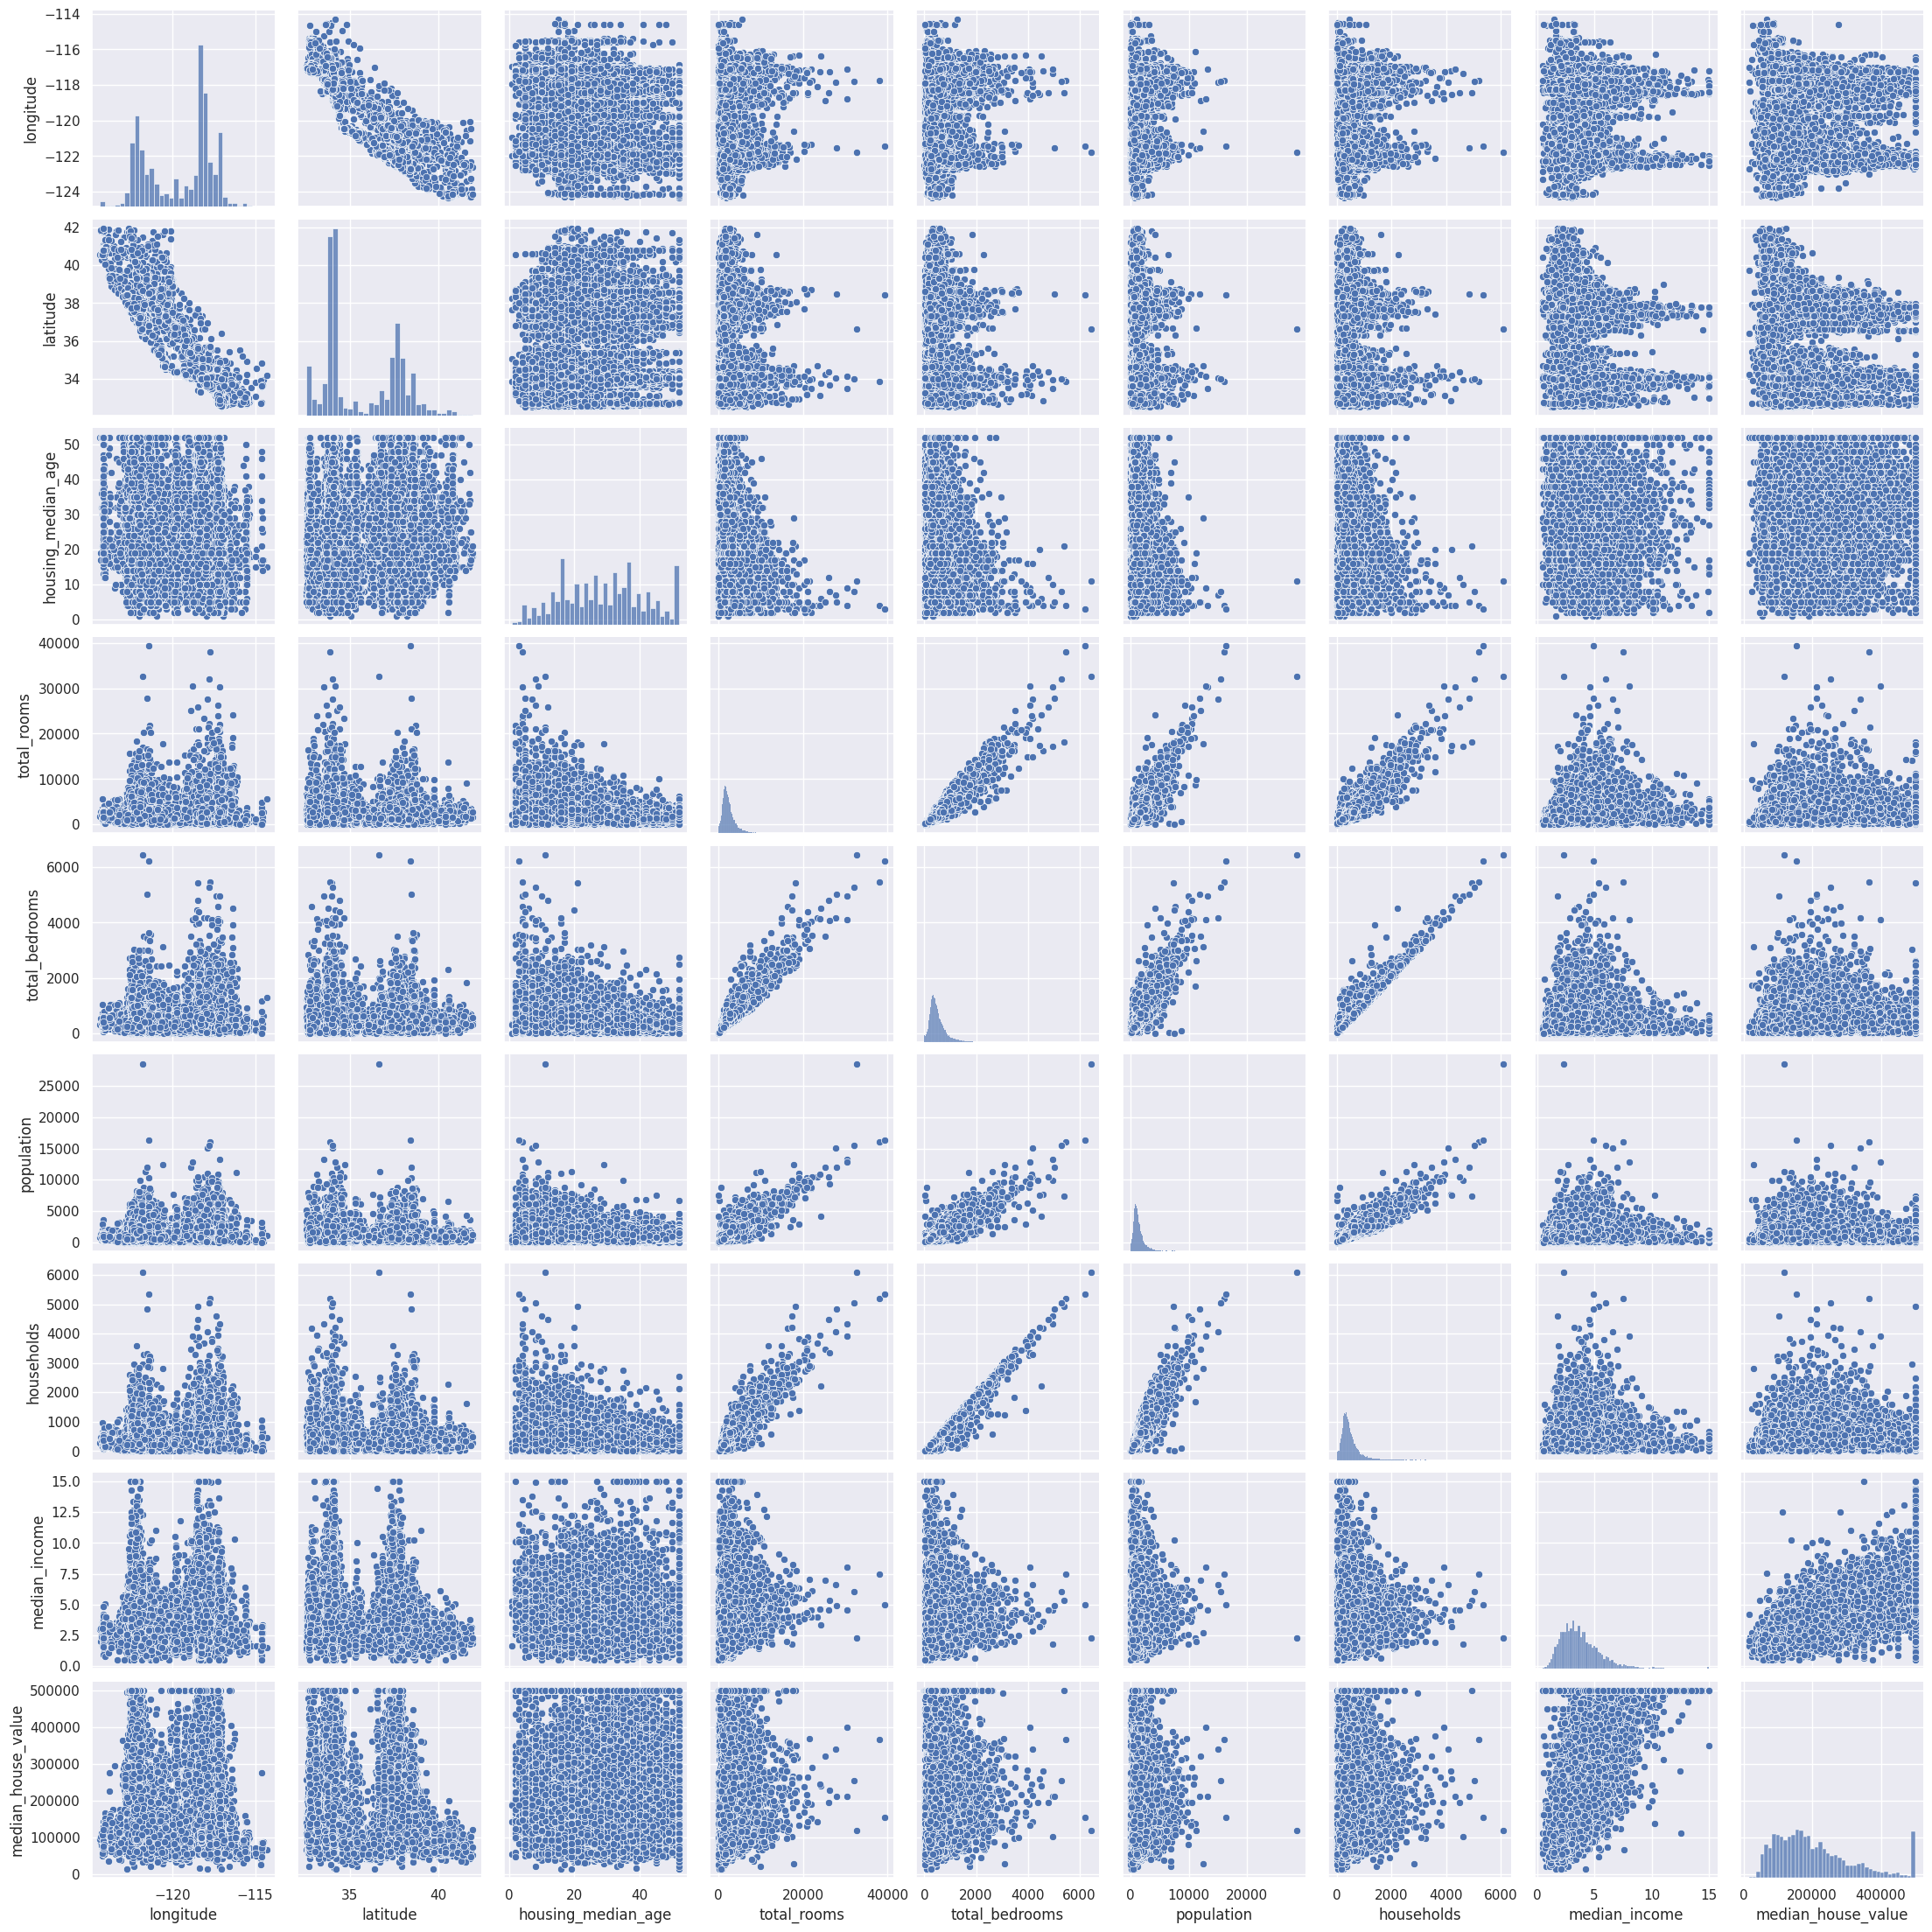

In [13]:
sns.pairplot(train_set)

# Feature Engineering

In [14]:
# Rooms per household
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]

# Bedrooms per room
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]

# Population per household
train_set["population_per_household"] = train_set["population"]/train_set["households"]

In [15]:
train_set.corr().median_house_value.apply(lambda x : abs(x)).sort_values(ascending = False)

<ipython-input-15-4c0053af6ce6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr().median_house_value.apply(lambda x : abs(x)).sort_values(ascending = False)


median_house_value         1.00
median_income              0.69
bedrooms_per_room          0.26
rooms_per_household        0.16
latitude                   0.15
total_rooms                0.14
housing_median_age         0.11
households                 0.07
total_bedrooms             0.05
longitude                  0.04
population_per_household   0.03
population                 0.02
Name: median_house_value, dtype: float64

# Prepare Data For ML

In [16]:
train_features = train_set.drop(['median_house_value'],axis=1)
train_labels = train_set['median_house_value']

# Data Cleaning

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Get Numerical Features
train_features_num = train_features.drop(['ocean_proximity'],axis = 1)

imputer.fit(train_features_num)

# Returns a Numpy Array
x = imputer.transform(train_features_num)

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Get Categorical Features
train_features_cat = train_features[['ocean_proximity']]

# Fit and Transform
y = encoder.fit_transform(train_features_cat)

In [19]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(x)
numerical_scaled

array([[5.31872510e-01, 3.74070138e-01, 4.70588235e-01, ...,
        2.54090544e-02, 1.14605171e-01, 2.26748217e-03],
       [4.87051793e-01, 2.76301807e-01, 5.68627451e-01, ...,
        3.18423535e-02, 1.14605171e-01, 1.30340820e-03],
       [1.90239044e-01, 5.58979809e-01, 1.00000000e+00, ...,
        2.37760494e-02, 1.14605171e-01, 2.41272490e-04],
       ...,
       [3.62549801e-01, 6.16365569e-01, 2.94117647e-01, ...,
        3.83883581e-02, 9.30787589e-02, 1.25882751e-03],
       [7.19123506e-01, 3.93198725e-02, 2.94117647e-01, ...,
        2.88776688e-02, 1.26662574e-01, 1.37784093e-03],
       [6.39442231e-01, 1.24335813e-01, 1.76470588e-01, ...,
        2.68646684e-02, 1.75975976e-01, 1.15677036e-03]])

# Pipeline

In [20]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                        ('std_scaler',StandardScaler())
                         ])


In [21]:
from sklearn.compose import make_column_transformer

num_attribs = list(train_features_num)
cat_attribs = ["ocean_proximity"]

full_pipe = make_column_transformer(  (num_pipeline,num_attribs),
                                      (OneHotEncoder(sparse = False,drop = 'first'),cat_attribs)
                                      )

In [22]:
train_features_prepared = full_pipe.fit_transform(train_features)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
train_features_prepared.shape

(16512, 15)

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_features_prepared,train_labels)

# Predictions
lin_reg_predictions = lin_reg.predict(train_features_prepared)

# Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train_features_prepared,train_labels)

# Predictions
tree_predictions = tree.predict(train_features_prepared)

# Accuracy

In [26]:
from sklearn.metrics import r2_score

print("Linear Regression Accuracy: ", r2_score(train_labels, lin_reg_predictions))
print("Decision Tree Accuracy: ", r2_score(train_labels, tree_predictions))

Linear Regression Accuracy:  0.6595558421641704
Decision Tree Accuracy:  1.0


# Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

lin_reg_score = cross_val_score(lin_reg,train_features_prepared,train_labels,scoring='r2',cv=10)

print("Linear Regression Accuracy: ", lin_reg_score)
print("Linear Regression Accuracy: ", round(lin_reg_score.mean(),2))
print("Linear Regression Standard Deviation: ", round(lin_reg_score.std(),2))


Linear Regression Accuracy:  [0.62970703 0.62598931 0.6744979  0.66487398 0.63310077 0.65398032
 0.67063835 0.66931788 0.66901294 0.68293602]
Linear Regression Accuracy:  0.66
Linear Regression Standard Deviation:  0.02


In [28]:
tree_score = cross_val_score(tree, train_features_prepared, train_labels, scoring="r2", cv=10)

print("Scores:", tree_score)
print("Mean:", round(tree_score.mean(),2))
print("Standard deviation:", round(tree_score.std(),2))

Scores: [0.61359922 0.65838714 0.66726416 0.63589795 0.630863   0.63201159
 0.60908726 0.62073315 0.61599263 0.63363625]
Mean: 0.63
Standard deviation: 0.02


# Testing Accuracy




In [29]:
test_features = test_set.drop("median_house_value", axis=1)
test_features['rooms_per_household'] = test_features['total_rooms']/test_features['households']
test_features['bedrooms_per_room'] = test_features['total_bedrooms']/test_features['total_rooms']
test_features['population_per_household'] = test_features['population']/test_features['households']
test_labels = test_set["median_house_value"].copy()

test_features_prepared = full_pipe.transform(test_features)

lin_reg_predictions_test = lin_reg.predict(test_features_prepared)
tree_predictions_test = tree.predict(test_features_prepared)

print("Linear Regression Accuracy on Test Data: ", r2_score(test_labels, lin_reg_predictions_test))
print("Decision Tree Accuracy on Test Data: ", r2_score(test_labels, tree_predictions_test))

Linear Regression Accuracy on Test Data:  0.6292943253638105
Decision Tree Accuracy on Test Data:  0.6518331510466198


# Saving model

In [30]:
# save linear regression model
import joblib
joblib.dump(lin_reg, "lin_reg.pkl")

['lin_reg.pkl']

In [31]:
# Load the model
lin_reg = joblib.load("lin_reg.pkl")

# Use the model to make predictions
lin_reg_predictions_test = lin_reg.predict(test_features_prepared)

In [32]:
# Save Pipeline
import joblib
joblib.dump(full_pipe, "full_pipeline.pkl")

['full_pipeline.pkl']